In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score

In [2]:
#Set viewing options
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)

In [13]:
trainlabel = pd.read_csv('data/train_10pct_labels.csv')

In [3]:
train = pd.read_csv('data/train_10pct.csv')

In [6]:
!pip install pandas_profiling 

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

thinc 8.0.3 requires pydantic<1.8.0,>=1.7.1, but you'll have pydantic 1.8.2 which is incompatible.
spacy 3.0.5 requires pydantic<1.8.0,>=1.7.1, but you'll have pydantic 1.8.2 which is incompatible.



  Created wheel for phik: filename=phik-0.11.2-py3-none-any.whl size=1107415 sha256=1b27123f58166ce5e4f966a47020dbe6c7d5f62a8c9b02a1d42ad1cea8248879
  Stored in directory: c:\users\cjmartin\appdata\local\pip\cache\wheels\72\9a\23\097c93fd8341220d92674891b6a9a30f0e389719d9b7291bd2
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=d7968d06a1ed929ee045e2586210e3d8e179c30b0e1cec993cb9524a72557d76
  Stored in directory: c:\users\cjmartin\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built phik htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.7.3
    Uninstalling pydantic-1.7.3:
      Successfully uninstalled pydantic-1.7.3


In [14]:
profile_train = pd.merge(train,trainlabel)

In [15]:
profile_train.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type  ... has_secondary_use_hotel  \
0                      t               r  ...                       0   
1                      o               r  ...                       0   
2                      t               r  ...                       0   
3                      t               r  ...                       0   
4                      t               r  ...                       0   

  has_secondary_use_rental has_secondary_use_institution  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   

  has_secondary_use_school has_secondary_use_industry  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   has_secondary_use_health_post  has_secondary_use_gov_office  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   has_secondary_use_use_police  has_secondary_use_other  damage_grade  
0                             0                        0             3  
1                             0                        0             2  
2                             0                        0             3  
3                             0                        0             2  
4                             0                        0             3  

[5 rows x 40 columns]

In [ ]:
from pandas_profiling import ProfileReport

In [16]:
profile = ProfileReport(profile_train, title='Report')
profile

In [ ]:
profile = ProfileReport(profile_train, title='Report')
profile

In [17]:
!pip install sweetviz

In [18]:
import sweetviz as sv

my_report = sv.analyze(profile_train)
my_report.show_html() 


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [19]:
dmg_corr = pd.DataFrame([['geo_level_1_id', .13], ['geo_level_2_id', .05], 
                         ['geo_level_3_id', .02], ['age' , .04],
                    ['area_percentage', .14], ['height_percentage' , .05]], columns=['feature', 'correlation ratio'])
dmg_corr 

feature  correlation ratio
0     geo_level_1_id               0.13
1     geo_level_2_id               0.05
2     geo_level_3_id               0.02
3                age               0.04
4    area_percentage               0.14
5  height_percentage               0.05

In [20]:
dmg_corr = dmg_corr.sort_values('correlation ratio', ascending=False)

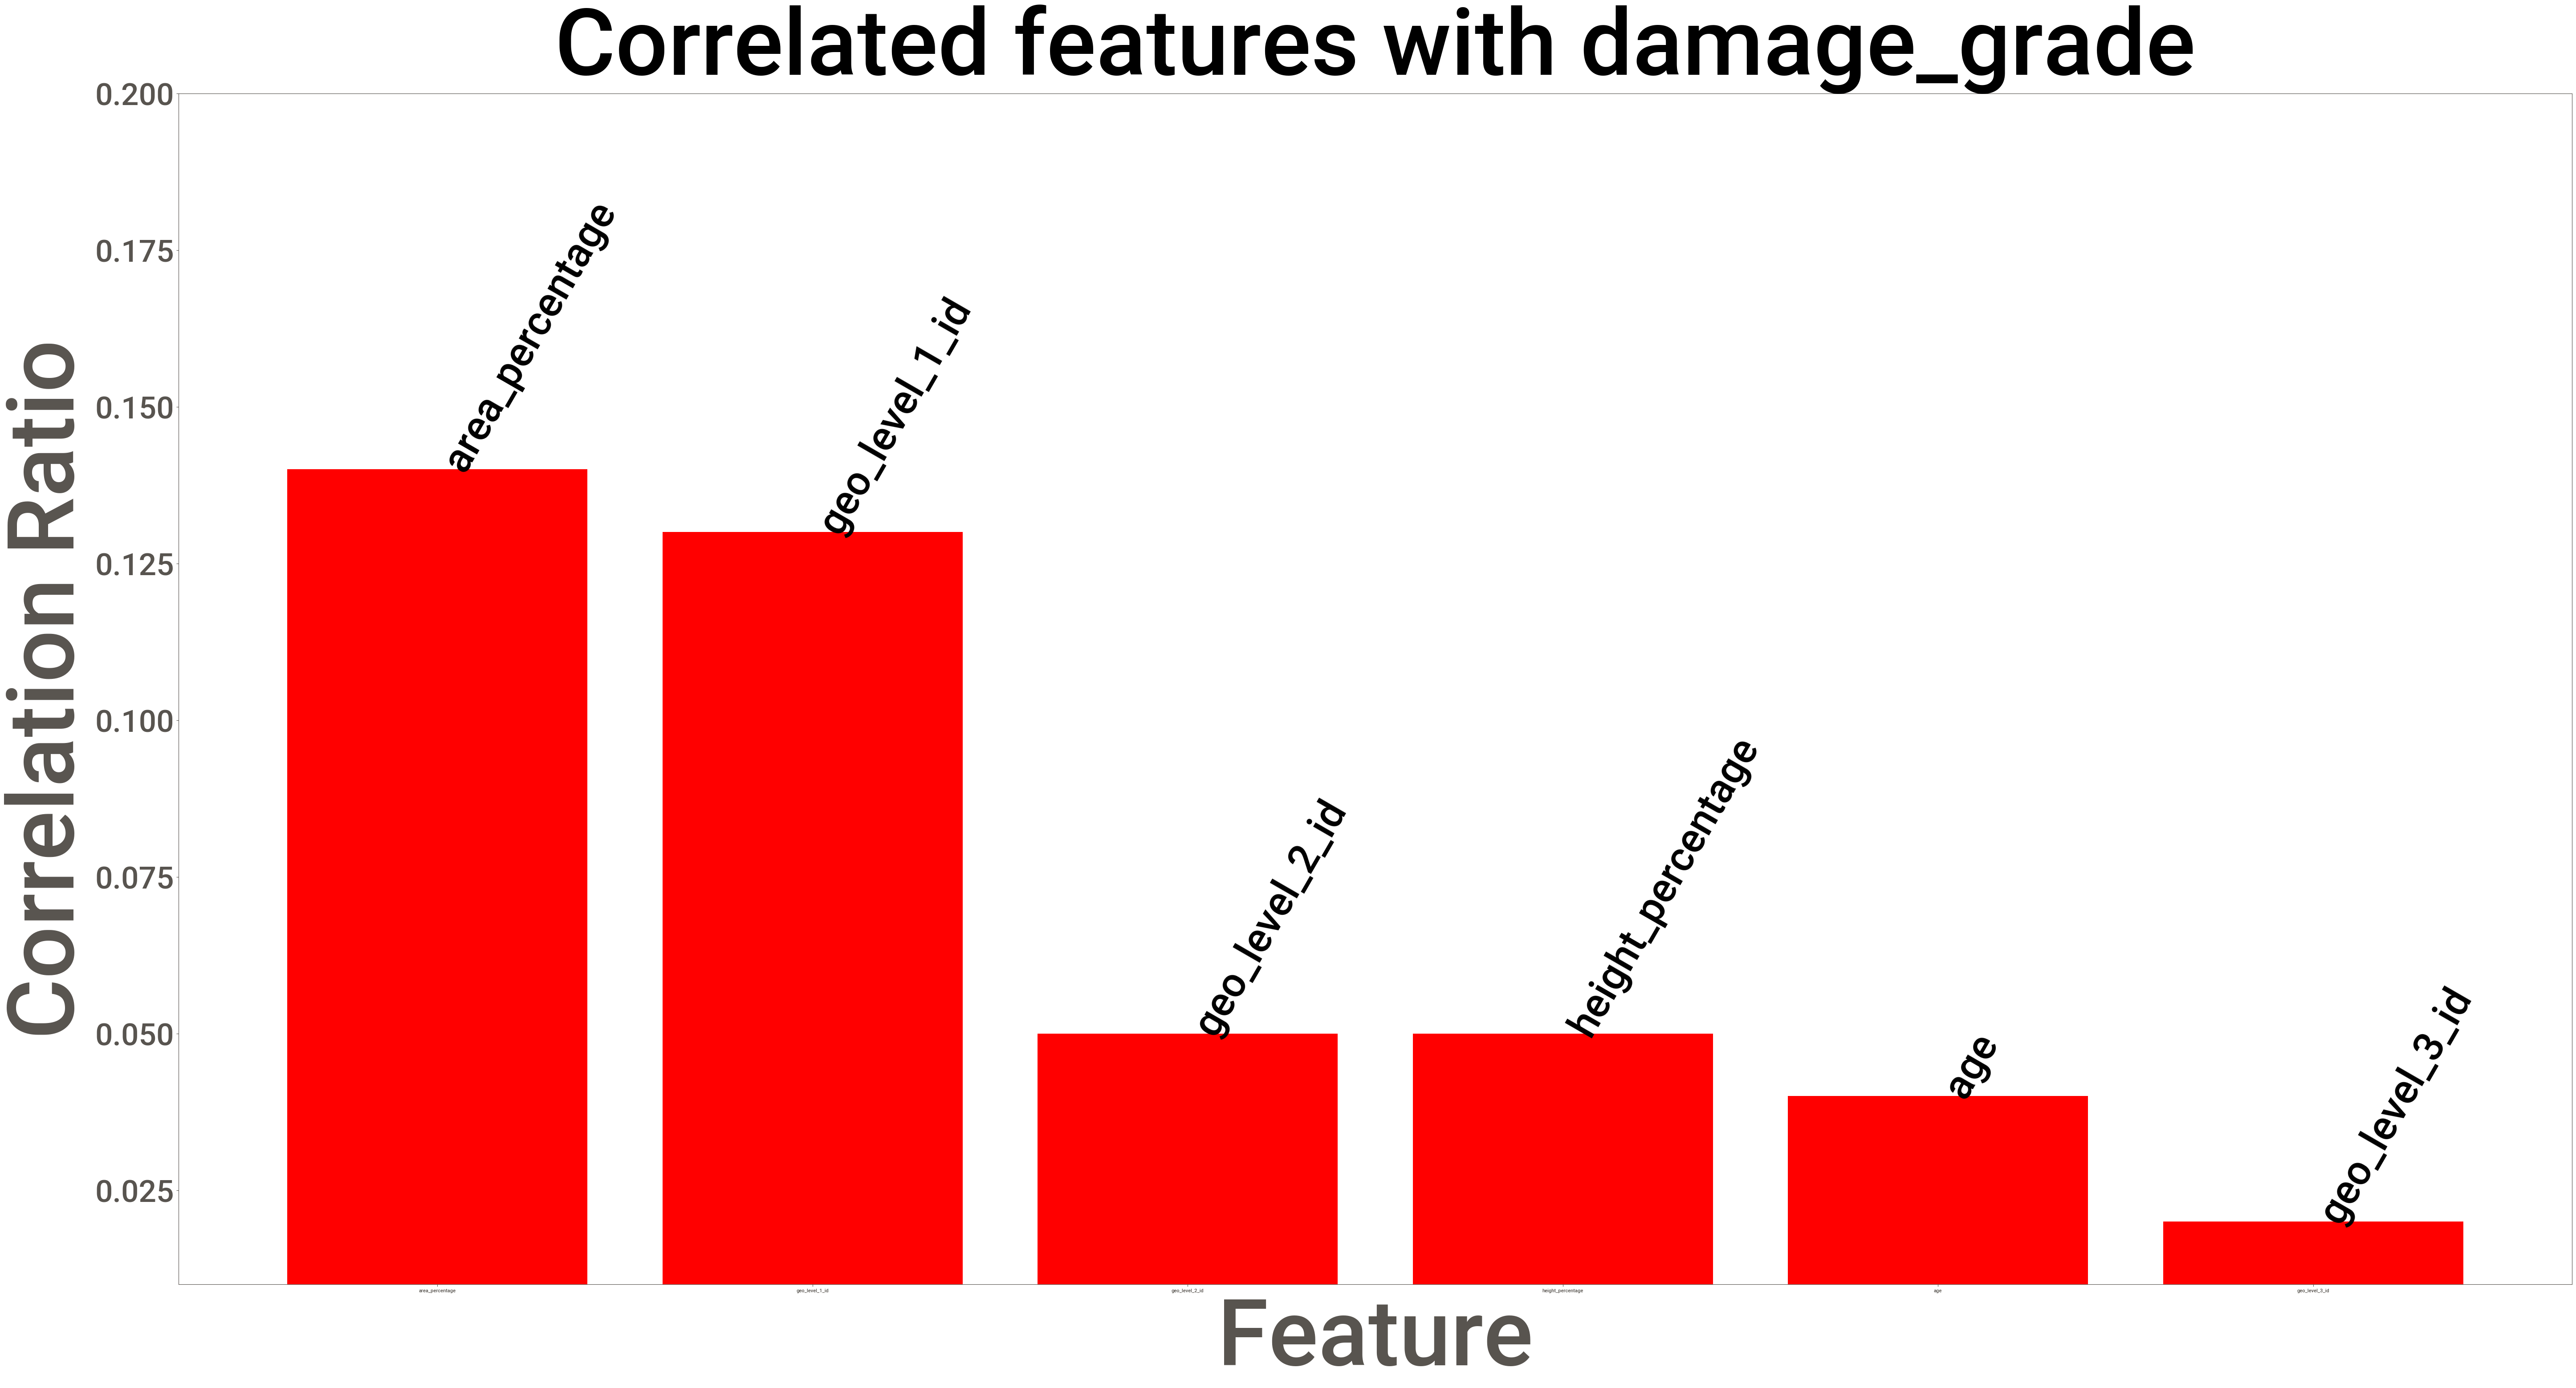

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.bar(dmg_corr['feature'], dmg_corr['correlation ratio'], color='red')
plt.ylim([.01,.20])
plt.yticks(fontsize=50)
for i in range(len(dmg_corr['correlation ratio'])):
    plt.text(x = dmg_corr['feature'][i], y = dmg_corr['correlation ratio'][i], s = dmg_corr['feature'][i], size = 66, rotation=60)
plt.subplots_adjust(top = 2.8, right = 5.5)
plt.title("Correlated features with damage_grade", fontsize=150)
plt.xlabel('Feature', fontsize=150)
plt.ylabel('Correlation Ratio', fontsize=150);